In [1]:
import numpy as np
import networkx as nx
import random


edges_Enron = np.loadtxt('Enron_DP.csv', delimiter=',')
edges_DBLP = np.loadtxt('DBLP_DP.csv', delimiter=',')
edges_Github = np.loadtxt('Github_DP.csv', delimiter=',')


In [2]:
v = ['a', 'b', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5']
e = np.array([[0, 5], [0, 3], [1, 4], [0, 1], [0, 2], [0, 4], [1, 5], [1, 6], [1, 7], [2, 3], [6, 7]])

e = e[np.lexsort((e[:, 1], e[:, 0]))]

data_Train = (v, e)

In [3]:
def get_nodes(G):
    nodes = set()
    
    for edge in G:
        nodes.add(edge[0])
        nodes.add(edge[1])
    
    sorted_nodes = sorted(nodes)
    return sorted_nodes

In [4]:
def degrees_nodes(G):
    deg = {}

    for edge in G:
        if edge[0] not in deg:
            deg[edge[0]] = 0
        if edge[1] not in deg:
            deg[edge[1]] = 0
            
        deg[edge[0]] += 1
        deg[edge[1]] += 1
    
    nodes = sorted(deg.keys())
    deg_array = np.array([deg[node] for node in nodes])
    
    return deg_array


In [5]:
def EBC(lb, e, v):

    node_index = v.index(lb)

    neighbors = set()
    for edge in e:
        if edge[0] == node_index:
            neighbors.add(edge[1])
        elif edge[1] == node_index:
            neighbors.add(edge[0])

    neighbors.add(node_index)

    subgraph_edges = []
    for edge in e:
        if edge[0] in neighbors and edge[1] in neighbors:
            subgraph_edges.append(edge)

    subgraph_nodes = sorted(neighbors)

    new_index = subgraph_nodes.index(node_index)
    
    G = nx.Graph()
    G.add_edges_from(subgraph_edges)

    betweenness_centrality = nx.betweenness_centrality(G, normalized=False)

    return list(betweenness_centrality.values())[new_index]


In [6]:
import numpy as np

def EBC_Geral(data):
    
    v, e = data
    ebcs = []

    for lb in v:
        ebcs.append(EBC(lb, e, v))
        print(lb)


    return ebcs


In [7]:
def EBC_global_sensitivity(deg):
    dG = np.sum(deg)
    dEBC = max(dG * (dG - 1)/4, dG)
    return dEBC    

In [8]:
def EBC_sensitivity_function(G, t, r_id):
    deg_r = degrees_nodes(G)[r_id]
    print((deg_r + t) * (deg_r + t - 1)/4, deg_r + t)
    delta_EBC = np.max([(deg_r + t) * (deg_r + t - 1)/4, deg_r + t])
    return delta_EBC

In [9]:
def EBC_local_sensitivity(G, v):

    id_nodes = get_nodes(G)
    edges = set(tuple(edge) for edge in G)
    LS = float('-inf')

    for lb in id_nodes:
        
        for i in range(len(id_nodes)):
            for j in range(i + 1, len(id_nodes)):
                edge = (id_nodes[i], id_nodes[j])
                if edge not in edges and (edge[1], edge[0]) not in edges: 
                    new_edges = edges.copy()
                    new_edges.add(edge)
                    new_edges = np.array(list(new_edges))

                    new_edges = new_edges[np.lexsort((new_edges[:, 1], new_edges[:, 0]))]


                    LSL = np.abs(EBC(v[lb], new_edges, v) - EBC(v[lb], np.array(list(edges)), v))

                    if LSL > LS:
                        LS = LSL
        
        for edge in edges:
            new_edges = edges.copy()
            new_edges.remove(edge)
            new_edges.add(edge)
            new_edges = np.array(list(new_edges))

            new_edges = new_edges[np.lexsort((new_edges[:, 1], new_edges[:, 0]))]

            LSL = np.abs(EBC(v[lb], new_edges, v) - EBC(v[lb], np.array(list(edges)), v))

            if LSL > LS:
                LS = LSL

    return LS

In [10]:
def EBC_local_sensitivity_time_t(G, t):

    id_nodes = get_nodes(G)
    edges = set(tuple(edge) for edge in G)

    possible_graphs = []


    for k in range(t):
        
        for i in range(len(id_nodes)):
            for j in range(i + 1, len(id_nodes)):
                edge = (id_nodes[i], id_nodes[j])
                if edge not in edges and (edge[1], edge[0]) not in edges: 
                    new_edges = edges.copy()
                    new_edges.add(edge)
                    new_edges = np.array(list(new_edges))

                    new_edges = new_edges[np.argsort(new_edges[:, 0])]

                    possible_graphs.append(new_edges)
        
        for edge in edges:
            new_edges = edges.copy()
            new_edges.remove(edge)
            new_edges.add(edge)
            new_edges = np.array(list(new_edges))

            new_edges = new_edges[np.argsort(new_edges[:, 0])]

            possible_graphs.append(new_edges)

    return possible_graphs



In [11]:
GS = EBC_local_sensitivity_time_t(e, 2)

for gs in GS:
    print(EBC_local_sensitivity(gs, v))

3.0
3.0
3.0
3.0
3.5
3.5
4.0
4.0
3.0
3.5
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.5
3.5
4.0
4.0
3.0
3.5
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0


In [12]:
deg = degrees_nodes(e)

dEBC = EBC_global_sensitivity(deg)

u = EBC_Geral((v, e))

a
b
v0
v1
v2
v3
v4
v5


In [13]:
import numpy as np

e = np.array([[0, 5], [0, 3], [0, 2], [6, 7], [0, 4], [0, 1], [1, 4], [1, 5], [1, 6], [1, 7], [2, 3]])

e_sorted = e[np.lexsort((e[:, 1], e[:, 0]))]

print(e_sorted)


[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [2 3]
 [6 7]]


In [14]:
EBC_local_sensitivity(e, v)

3.0

In [15]:
def Permute_and_Flip(epsilon, u, R):

    permuted_indices = np.random.permutation(len(R))
    permuted_R = [R[i] for i in permuted_indices]
    permuted_u = [u[i] for i in permuted_indices]
    
    u_max = max(permuted_u)
    
    for r, u_i in zip(permuted_R, permuted_u):
        pr = np.exp(epsilon / (2 * (u_i - u_max)))
        
        if np.random.rand() < pr:
            return r


In [16]:
def Exponential_Mechanism(u, epsilon, G):
    
    deg = degrees_nodes(G)
    dEBC = EBC_global_sensitivity(deg)
    p = np.exp((epsilon * np.array(u)) / (2 * dEBC))
    p /= p.sum()

    return p

In [17]:
def Local_Dampening_Mechanism(u_r, sensibilidade, r_id, G):
    print(u_r)
    if u_r >= 0:
        
        t = 0
        bt0 = 0
        bt1 = sensibilidade(G, t, r_id)
        
        while True:
            print(bt1)

            if ((bt0 <= u_r) and  (u_r < bt1)):
                break
            
            t += 1
            bt0 = bt1
            bt1 += sensibilidade(G, t, r_id)
            
    elif u_r < 0:

        t = 0
        bt0 = 0
        bt1 = -sensibilidade(G, 0, r_id)
        
        while True:

            if ((bt1 <= u_r) and  (u_r < bt0)):
                break
            
            t -= 1
            bt0 = bt1
            bt1 -= sensibilidade(G, t, r_id)
    
    D = (u_r - bt0) / (bt1 - bt0) + t
    
    return D


In [18]:
def Choose_r(p, R):
    id = np.random.choice(len(p), p=p)
    return R[id]

In [19]:
p = Exponential_Mechanism(u, epsilon = 2, G = e)

Choose_r(p, v)

'v2'

In [20]:
Local_Dampening_Mechanism(u[0], EBC_sensitivity_function, 0, e)

6.5
5.0 5
5.0
7.5 6
12.5


1.2

In [21]:
import numpy as np

def degrees_nodes(G):
    # Use a dictionary to track the degree of each node
    deg = {}

    for edge in G:
        # For each edge, increment the degree of both nodes
        if edge[0] not in deg:
            deg[edge[0]] = 0
        if edge[1] not in deg:
            deg[edge[1]] = 0
            
        deg[edge[0]] += 1
        deg[edge[1]] += 1
    
    # Convert the dictionary to a sorted list of degrees
    nodes = sorted(deg.keys())
    deg_array = np.array([deg[node] for node in nodes])
    
    return deg_array

# Example usage
e = np.array([[0, 1], [0, 3], [0, 4], [0, 5], [1, 4], [1, 5], [1, 6], [1, 7], [6, 7]])
print(degrees_nodes(e))


[4 5 1 2 2 2 2]


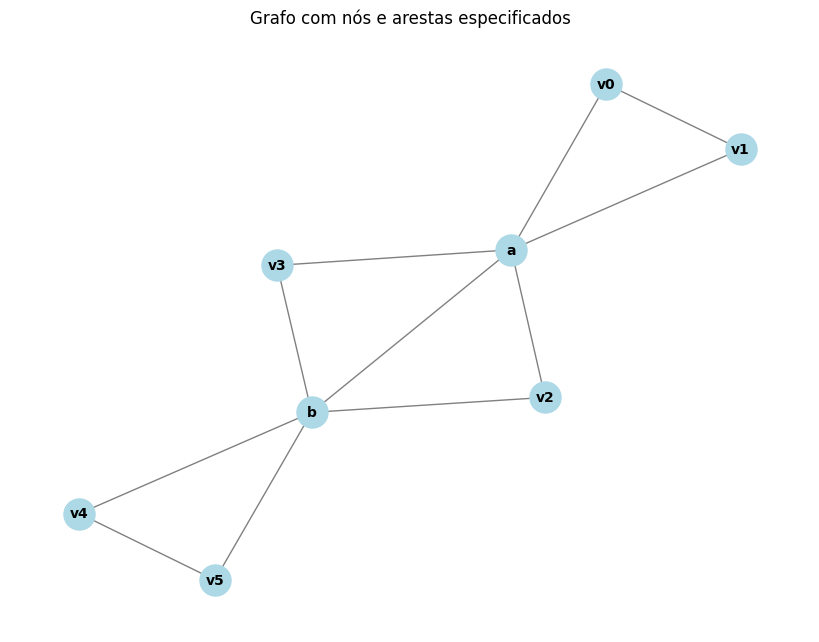

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Nós do grafo
v = ['a', 'b', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5']

# Arestas do grafo
e = np.array([[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 4], [1, 5], [1, 6], [1, 7], [2, 3], [6, 7]])

data = (v, e)

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós ao grafo
for i, node in enumerate(v):
    G.add_node(i, label=node)

# Adicionar arestas ao grafo
for edge in e:
    G.add_edge(edge[0], edge[1])

# Posição dos nós para visualização
pos = nx.spring_layout(G)

# Desenhar o grafo
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Grafo com nós e arestas especificados')
plt.show()


In [23]:
import numpy as np

conjunto_de_tuplas = {(0, 1), (0, 4), (1, 5), (0, 3), (1, 4), (2, 3), (6, 7), (0, 2), (1, 7), (0, 5), (1, 6)}

array = np.array(list(conjunto_de_tuplas))

print(array)


[[0 1]
 [0 4]
 [1 5]
 [0 3]
 [1 4]
 [2 3]
 [6 7]
 [0 2]
 [1 7]
 [0 5]
 [1 6]]


In [236]:
v = get_nodes(edges_Enron)
u = EBC_Geral((v, edges_Enron))

caminho_arquivo = 'Enron_EBC.csv'

np.savetxt(caminho_arquivo, u, delimiter=',', fmt='%d')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0


KeyboardInterrupt: 

In [ ]:
v = get_nodes(edges_Github)
u = EBC_Geral((v, edges_Github))

caminho_arquivo = 'Github_EBC.csv'

np.savetxt(caminho_arquivo, u, delimiter=',', fmt='%d')

In [ ]:
v = get_nodes(edges_DBLP)
u = EBC_Geral((v, edges_DBLP))

caminho_arquivo = 'DBLP_EBC.csv'

np.savetxt(caminho_arquivo, u, delimiter=',', fmt='%d')